In [140]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [141]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [2]:
data = np.load("data/file_field0.13_intf.npy")

In [15]:
@njit
def total_change(data, t_0, tau_max):
    changes = np.zeros(tau_max)
    for i, t_i in enumerate(range(t_0+1, t_0+tau_max+1)):
        changes[i] =(data[t_i, :] > data[t_0,:]).sum()/data.shape[1]    return changes

In [153]:
tau_max = 2000
curves = []
for t0 in range(0, data.shape[0]-tau_max):
    curves.append(total_change(data, t0, tau_max))
curves = np.array(curves)

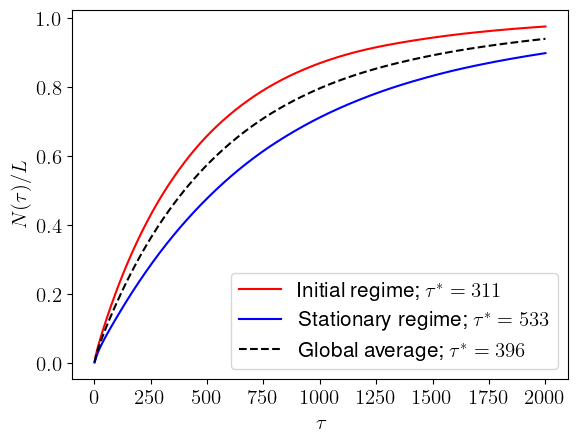

In [154]:
n1,n2,n3 = curves[:30000].mean(axis=0), curves[30000:].mean(axis=0), curves[:].mean(axis=0)
t1,t2,t3 = np.argsort(np.abs(n1-0.5))[:10].mean(),np.argsort(np.abs(n2-0.5))[:10].mean(), np.argsort(np.abs(n3-0.5))[:10].mean()
plt.plot(np.arange(1, 1+tau_max),n1,color='red', label="Initial regime; $\\tau^*=%i$" % t1)
plt.plot(np.arange(1, 1+tau_max),n2,color='blue',  label="Stationary regime; $\\tau^*=%i$" % t2)
plt.plot(np.arange(1, 1+tau_max),n3,color='black', ls='dashed',  label="Global average; $\\tau^*=%i$" % t3)
plt.legend(fontsize=15)
plt.xlabel("$\\tau$", fontsize=15)
plt.ylabel("$N(\\tau)/L$", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Nt.pdf")
plt.show()

In [121]:
t_start = 35000
mean_curve = curves[t_start:].mean(axis=0)
std_curve = curves[t_start:].std(axis=0)

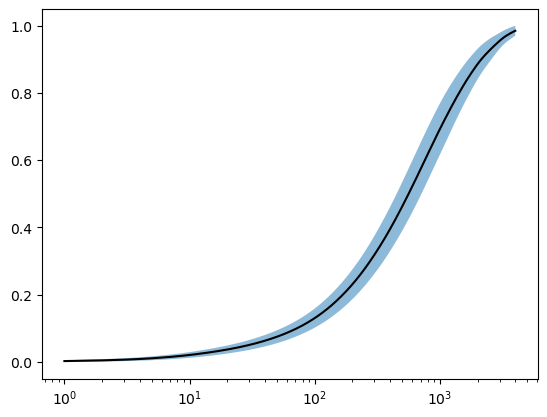

In [127]:
plt.plot(np.arange(1, 1+tau_max),mean_curve,color='black')
plt.fill_between(np.arange(1, 1+tau_max), mean_curve-std_curve, mean_curve+std_curve, alpha=0.5)
plt.xscale('log')

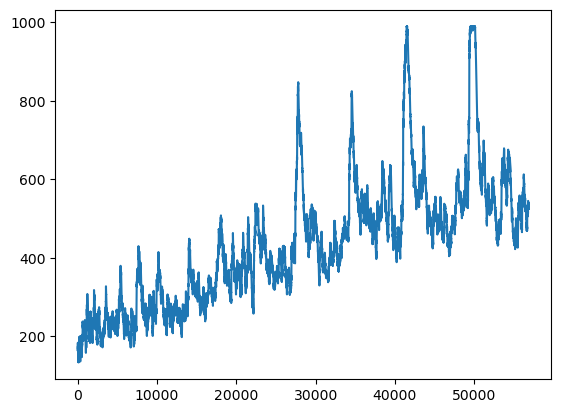

In [72]:
plt.plot(np.argsort(np.abs(curves-0.5), axis=1)[:, :20].mean(axis=1))

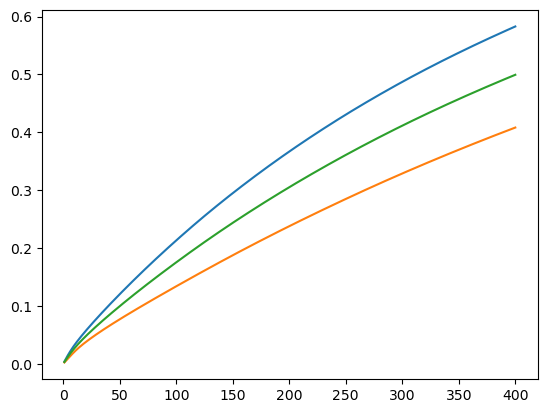

In [54]:
plt.plot(np.arange(1, tau_max+1), curves[:30000].mean(axis=0))
#plt.plot(np.arange(1, tau_max+1), curves[10000:20000].mean(axis=0))
#plt.plot(np.arange(1, tau_max+1), curves[20000:30000].mean(axis=0))
plt.plot(np.arange(1, tau_max+1), curves[30000:].mean(axis=0))
plt.plot(np.arange(1, tau_max+1), curves.mean(axis=0))

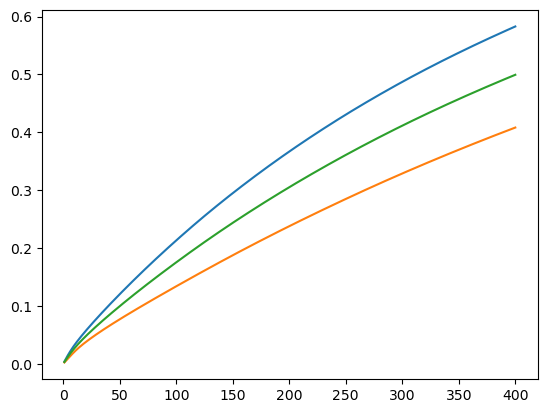

In [ ]:
plt.plot(np.arange(1, tau_max+1), curves[:30000].mean(axis=0))
#plt.plot(np.arange(1, tau_max+1), curves[10000:20000].mean(axis=0))
#plt.plot(np.arange(1, tau_max+1), curves[20000:30000].mean(axis=0))
plt.plot(np.arange(1, tau_max+1), curves[30000:].mean(axis=0))
plt.plot(np.arange(1, tau_max+1), curves.mean(axis=0))